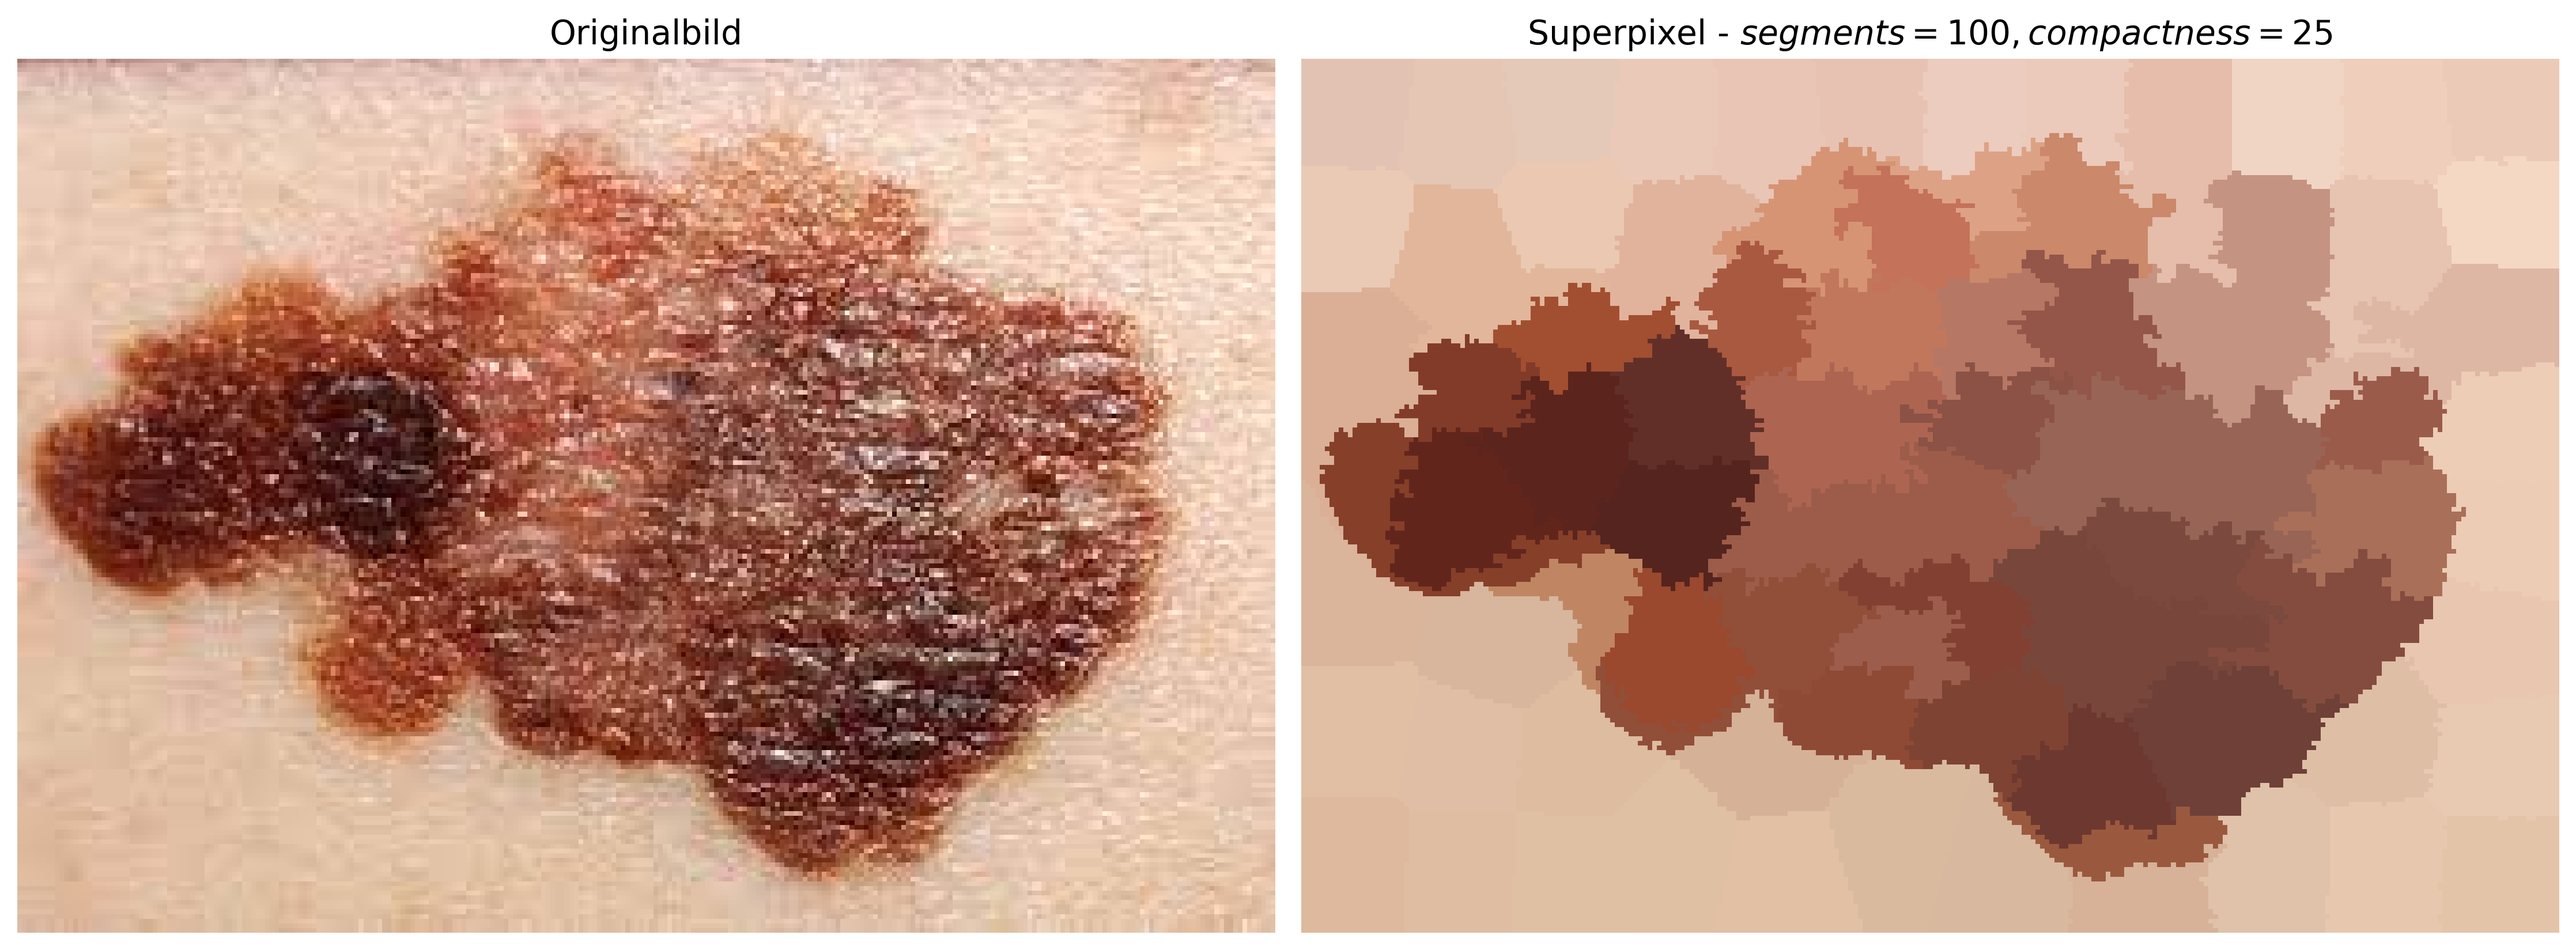

In [82]:
from skimage import color
from skimage import io
from skimage.segmentation import slic, mark_boundaries
from skimage.color import label2rgb
import matplotlib.pyplot as plt

# Bild laden
image = io.imread('tester.jpg')

# Bild in Lab-Farbraum konvertieren
image_lab = color.rgb2lab(image)

n_segments = 100
compactness = 25
# Superpixel-Segmentierung durchführen
segments = slic(image_lab, n_segments, compactness, start_label=1)

# Segmentierungsergebnisse visualisieren
fig, ax = plt.subplots(1, 2, figsize=(15, 8), dpi=300)

# Originalbild anzeigen
ax[0].imshow(image)
ax[0].set_title('Originalbild', fontsize=14)
ax[0].axis('off')

# Superpixel-Bild anzeigen
ax[1].imshow(label2rgb(segments, image, kind='avg'))
ax[1].set_title('Superpixel - $segments = %d, compactness = %d$' % (n_segments, compactness), fontsize=14)
ax[1].axis('off')

plt.tight_layout()
plt.show()


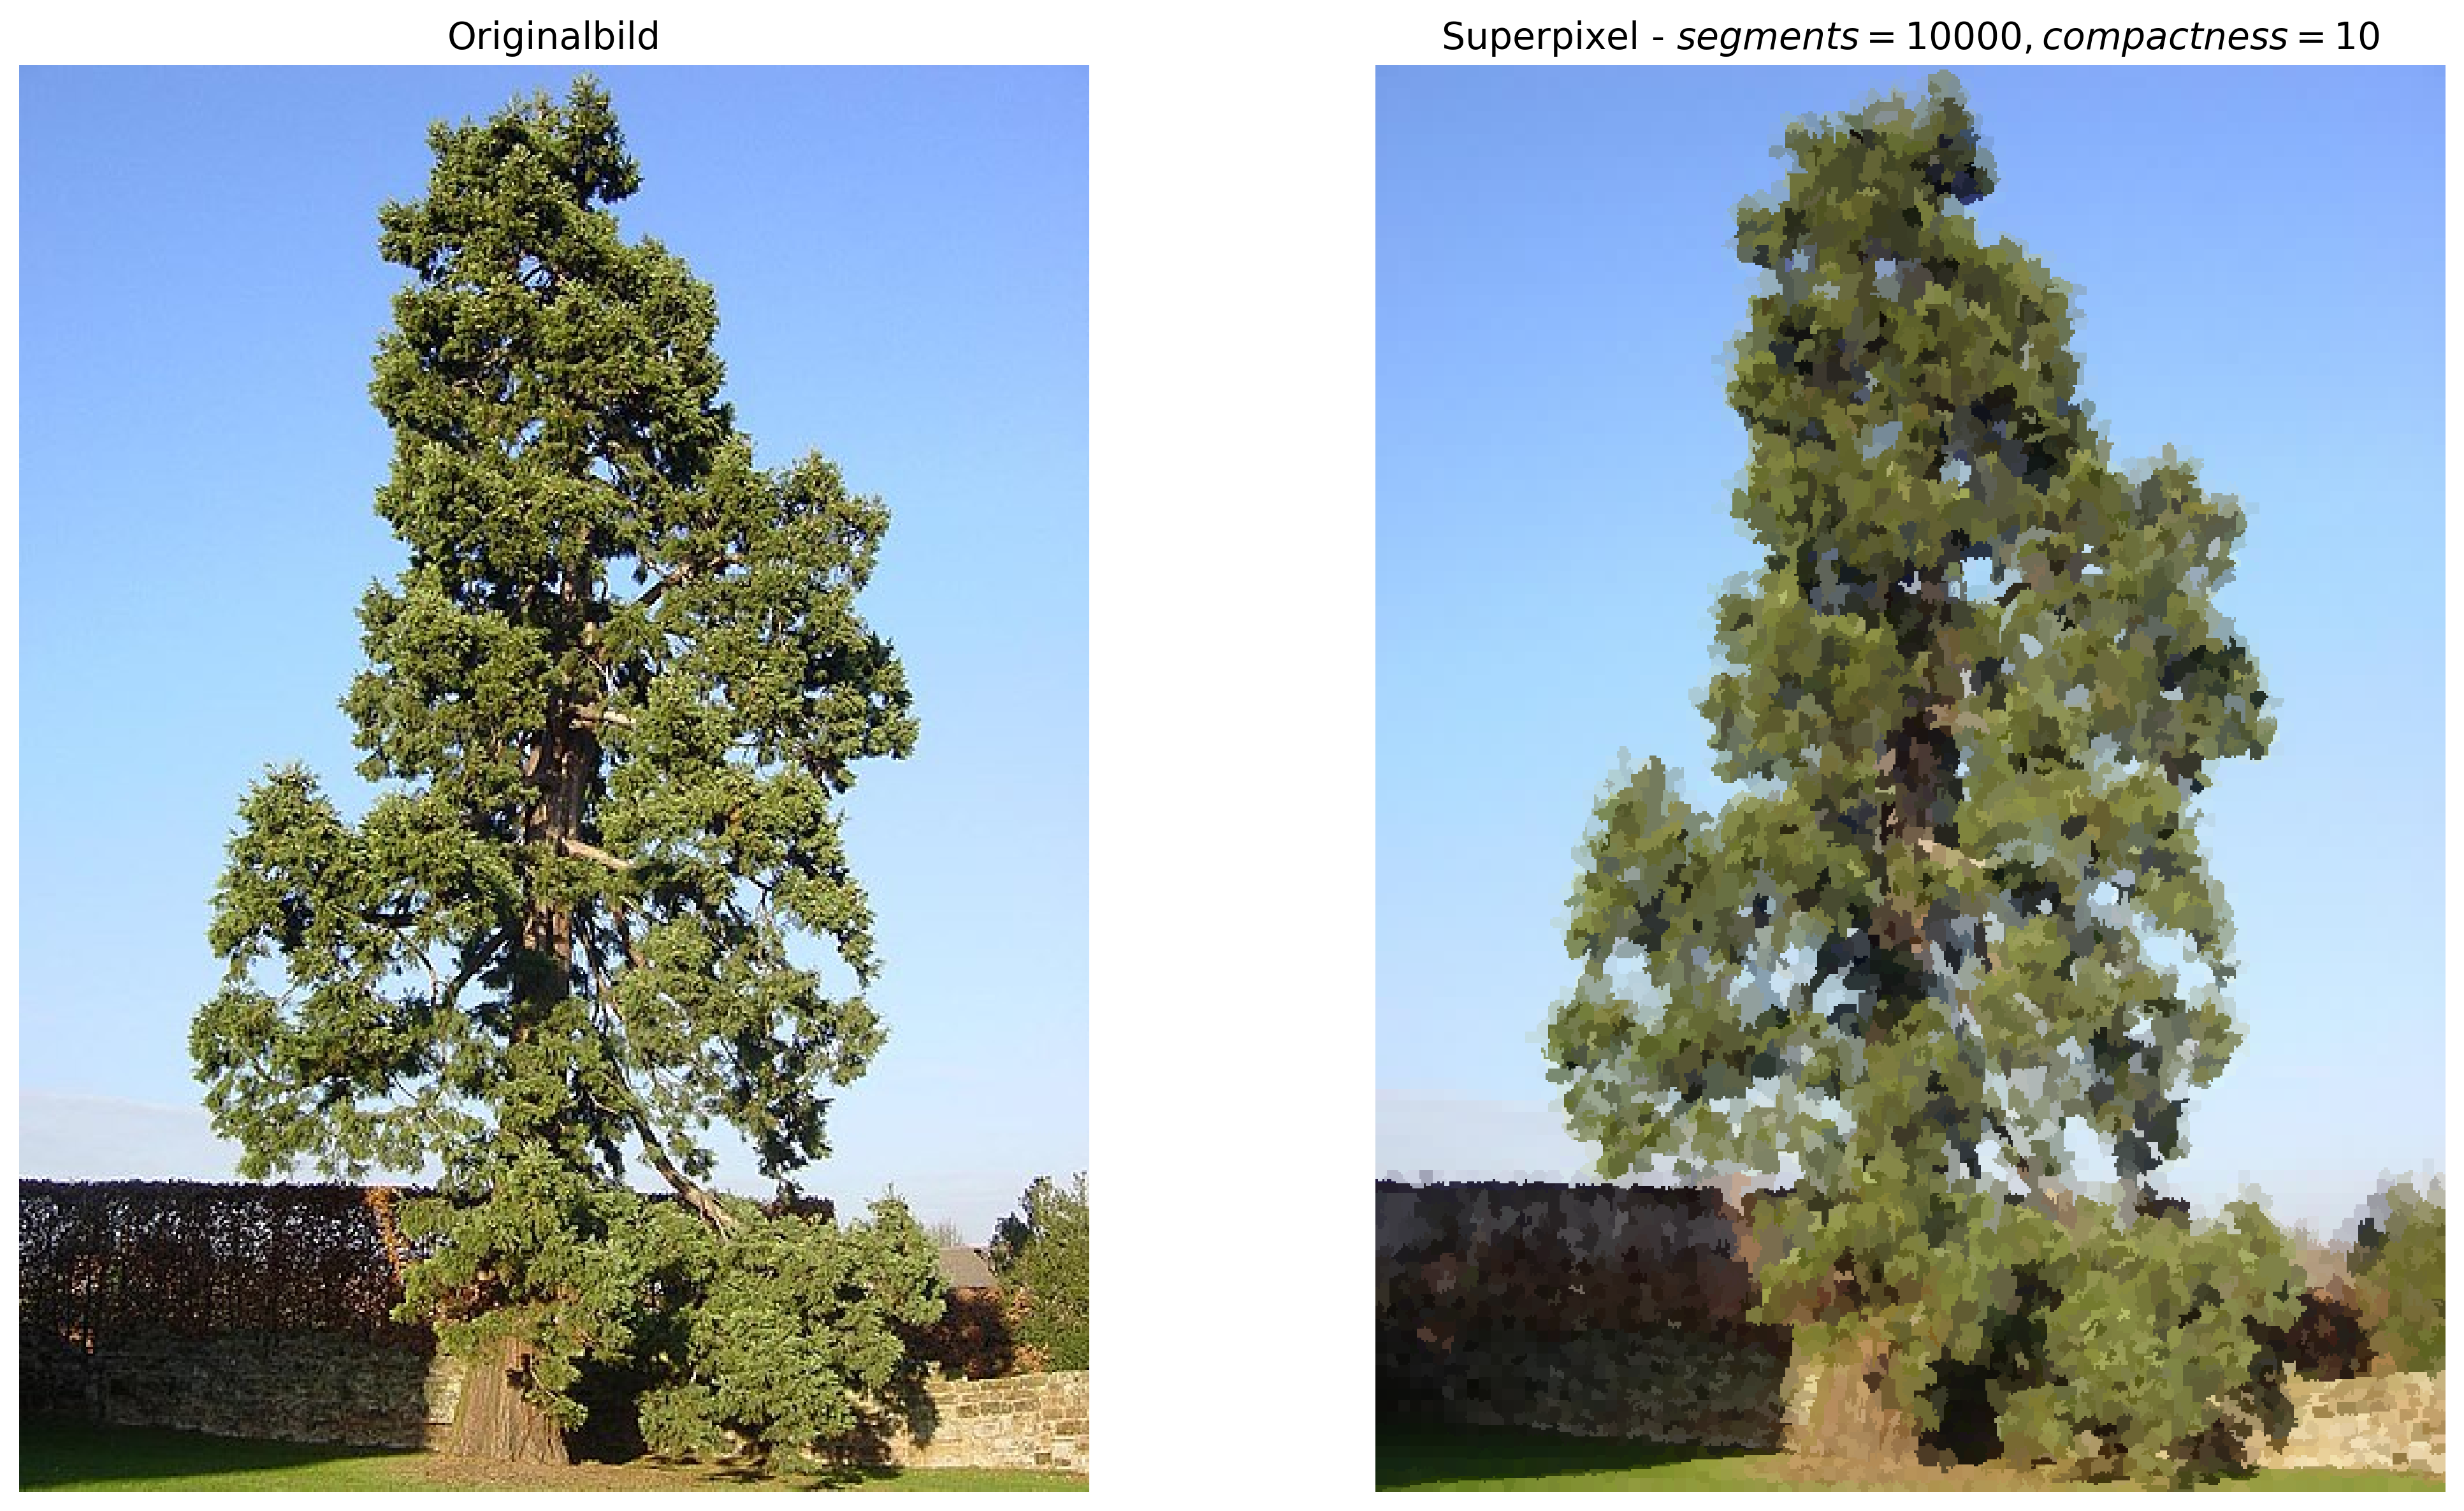

In [74]:
from skimage import color, io, segmentation
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt

# Bild laden
image = io.imread('Baum.jpg')

# Bild in Lab-Farbraum konvertieren
image_lab = color.rgb2lab(image)

n_segments = 10000
compactness = 10
# Superpixel-Segmentierung durchführen
segments = slic(image_lab, n_segments=n_segments, compactness=compactness, start_label=1)

# Durchschnittsfarben für die Superpixel berechnen
out1 = color.label2rgb(segments, image, kind='avg', bg_label=0)

# Grenzen der Superpixel finden und markieren
out2 = mark_boundaries(out1, segments, color=(1, 1, 0))

# Segmentierungsergebnisse visualisieren
fig, ax = plt.subplots(1, 2, figsize=(15, 8), dpi=300)

# Originalbild anzeigen
ax[0].imshow(image)
ax[0].set_title('Originalbild', fontsize=14)
ax[0].axis('off')

# Superpixel-Bild mit hervorgehobenen Grenzen anzeigen
ax[1].imshow(out1)
ax[1].set_title('Superpixel - $segments = %d, compactness = %d$' % (n_segments, compactness), fontsize=14)
ax[1].axis('off')

plt.tight_layout()
plt.show()
